In [1]:
%store -r dfObj1

In [2]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [12]:
vectorizer = TfidfVectorizer(stop_words='english')

# make sure you have unicode strings [0] is the column of the sentences
X = vectorizer.fit_transform(dfObj1[0].values.astype('U')) 

true_k = 5

km = KMeans(n_clusters=5).fit(X)

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=20)
Xt = model.fit_transform(X)

In [9]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [10]:
import numpy as np

In [13]:
# things with tf-idf score 
X = X.toarray()
fns =  np.array(vectorizer.get_feature_names()) # feature names/ordered by index

In [14]:
# retrieve labels with max score
labels = model.labels_ 
d = []
for n in sorted(np.unique(labels)):
    t = X[(labels == n)].sum(axis=0) #max tf/idf score cumulative/cluster
    words = fns[t == t.max()]
    d.append(",".join(words))

In [15]:
t = Xt.T # cluster distance space X transpose to be plotted with mpl

0
1
2
3
4


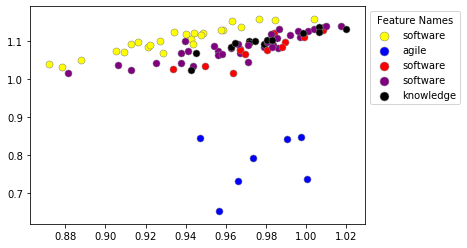

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt


### plot the clusters
fig, ax = plt.subplots(1,1)


cluster_color_dict = {0:'yellow', 1 :'blue', 2 :'red', 3:'purple', 4:'black'} # change these to desired colors
#cluster_color_dict = {0:'green', 1 :'blue', 2 :'red'} # change these to desired colors
for i in range(len(t[0])):

    ax.scatter(t[0][i], t[1][i], c= cluster_color_dict[labels[i]], edgecolors='grey', lw = 0.5, s = 50)
    
p1 = [] # legend patches 
for i in range(5):
    print(i)
    h = ax.scatter([],[], c= cluster_color_dict[i], 
                    edgecolors= 'grey', lw = 0.5, s = 80, label = d[i]) 
    p1.append(h)

l1 = ax.legend(handles = p1, title= 'Feature Names',  bbox_to_anchor = (1,1))

In [17]:
# save the figure
fig.savefig('Evaluation_SLR3_5clusters.png', dpi=100, bbox_inches='tight')

In [18]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 software
 process
 development
 mutation
 systems
 quality
 metrics
 management
 assembly
 measurement
Cluster 1:
 agile
 software
 scrum
 development
 agility
 game
 studies
 dase
 research
 pilot
Cluster 2:
 software
 risks
 slrs
 risk
 distance
 requirements
 research
 studies
 process
 development
Cluster 3:
 software
 process
 research
 studies
 models
 quality
 model
 improvement
 papers
 review
Cluster 4:
 knowledge
 project
 social
 sharing
 projects
 management
 debt
 software
 diversity
 organizational


In [20]:
import pandas as pd

In [21]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dfObj1.index.values
cluster_map['cluster'] = model.labels_

In [22]:
cluster_map[cluster_map.cluster == 0]

,data_index,cluster
2,2,0
3,3,0
20,20,0
27,27,0
28,28,0
29,29,0
33,33,0
34,34,0
40,40,0
41,41,0


In [23]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
0,0,1
8,8,1
9,9,1
39,39,1
72,72,1
91,91,1
92,92,1


In [25]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
5,5,2
11,11,2
13,13,2
18,18,2
19,19,2
21,21,2
42,42,2
47,47,2
67,67,2
74,74,2


In [26]:
cluster_map[cluster_map.cluster == 3]

,data_index,cluster
1,1,3
4,4,3
6,6,3
7,7,3
10,10,3
12,12,3
14,14,3
15,15,3
16,16,3
17,17,3
